In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)
print("Original Dataset Loaded:")
print(df.shape)
print(df.head())
print("\n")

Original Dataset Loaded:
(1000, 14)
   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1     

In [29]:
# 1. Remove duplicate rows (if any)
df = df.drop_duplicates()
print("After Removing Duplicates:")
print(df.shape)
print("\n")

After Removing Duplicates:
(1000, 14)




In [30]:
# 2. Handle missing or incorrect values
print("Before Replacing 0s in 'serumcholestrol':")
print(df['serumcholestrol'].value_counts().sort_index().head(10))

df['serumcholestrol'] = df['serumcholestrol'].replace(0, np.nan)
df['serumcholestrol'] = df['serumcholestrol'].fillna(df['serumcholestrol'].median())

print("After Handling 'serumcholestrol' (0 replaced & filled with median):")
print(df['serumcholestrol'].describe())
print("\n")


Before Replacing 0s in 'serumcholestrol':
0      53
85      1
86      4
87      2
132     6
133     5
134     3
135     6
136     3
137     9
Name: serumcholestrol, dtype: int64
After Handling 'serumcholestrol' (0 replaced & filled with median):
count    1000.000000
mean      328.725000
std       110.034826
min        85.000000
25%       249.000000
50%       326.000000
75%       404.250000
max       602.000000
Name: serumcholestrol, dtype: float64




In [31]:
# 3. Convert categorical numerical labels to meaningful labels
print("Unique values before mapping categorical columns:")
print("gender:", df['gender'].unique())
print("exerciseangia:", df['exerciseangia'].unique())
print("fastingbloodsugar:", df['fastingbloodsugar'].unique())
print("target:", df['target'].unique())

df['gender'] = df['gender'].map({1: 'Male', 0: 'Female'})
df['exerciseangia'] = df['exerciseangia'].map({1: 'Yes', 0: 'No'})
df['fastingbloodsugar'] = df['fastingbloodsugar'].map({1: 'High', 0: 'Normal'})
df['target'] = df['target'].map({1: 'Disease', 0: 'No Disease'})

print("After Label Conversion:")
print(df[['gender', 'exerciseangia', 'fastingbloodsugar', 'target']].head())
print("\n")

Unique values before mapping categorical columns:
gender: [1 0]
exerciseangia: [0 1]
fastingbloodsugar: [0 1]
target: [1 0]
After Label Conversion:
  gender exerciseangia fastingbloodsugar      target
0   Male            No            Normal     Disease
1   Male            No            Normal  No Disease
2   Male           Yes            Normal  No Disease
3   Male            No              High     Disease
4   Male            No            Normal     Disease




In [32]:
# 4. Outlier Detection and Removal using IQR method
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].astype(float)
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

num_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak', 'noofmajorvessels']
print("Before Outlier Removal (describe):")
print(df[num_cols].describe())

for col in num_cols:
    remove_outliers(col)

print("After Outlier Removal (describe):")
print(df[num_cols].describe())
print("\n")


Before Outlier Removal (describe):
              age    restingBP  serumcholestrol  maxheartrate      oldpeak  \
count  1000.00000  1000.000000      1000.000000   1000.000000  1000.000000   
mean     49.24200   151.747000       328.725000    145.477000     2.707700   
std      17.86473    29.965228       110.034826     34.190268     1.720753   
min      20.00000    94.000000        85.000000     71.000000     0.000000   
25%      34.00000   129.000000       249.000000    119.750000     1.300000   
50%      49.00000   147.000000       326.000000    146.000000     2.400000   
75%      64.25000   181.000000       404.250000    175.000000     4.100000   
max      80.00000   200.000000       602.000000    202.000000     6.200000   

       noofmajorvessels  
count       1000.000000  
mean           1.222000  
std            0.977585  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%            2.000000  
max            3.000000  
After Outlier Removal (descr

In [34]:
# 5. Feature Selection (Remove highly correlated features)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
print("Highly Correlated Features (correlation > 0.85):", high_corr_features)

df.drop(high_corr_features, axis=1, inplace=True)
print("After Dropping Highly Correlated Features:")
print(df.shape)
print("\n")


Highly Correlated Features (correlation > 0.85): []
After Dropping Highly Correlated Features:
(1000, 14)




In [35]:
# 6. Normalize numerical columns using Min-Max Scaling
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("After Min-Max Normalization (first 5 rows):")
print(df[num_cols].head())
print("\n")


After Min-Max Normalization (first 5 rows):
        age  restingBP  serumcholestrol  maxheartrate   oldpeak  \
0  0.550000   0.726415         0.466151      0.580153  0.854839   
1  0.333333   0.000000         0.278530      0.335878  0.596774   
2  0.483333   0.367925         0.110251      1.000000  0.806452   
3  0.383333   0.415094         0.406190      0.625954  0.516129   
4  0.183333   0.990566         0.466151      0.496183  0.854839   

   noofmajorvessels  
0          1.000000  
1          0.333333  
2          0.000000  
3          0.666667  
4          0.666667  




In [36]:
# 7. Encode categorical variables for ML compatibility
df_encoded = pd.get_dummies(df, columns=['gender', 'chestpain', 'restingrelectro', 'slope'])
print("After Encoding Categorical Variables:")
print(df_encoded.head())
print("Final Shape:", df_encoded.shape)
print("\n")

After Encoding Categorical Variables:
   patientid       age  restingBP  serumcholestrol fastingbloodsugar  \
0     103368  0.550000   0.726415         0.466151            Normal   
1     119250  0.333333   0.000000         0.278530            Normal   
2     119372  0.483333   0.367925         0.110251            Normal   
3     132514  0.383333   0.415094         0.406190              High   
4     146211  0.183333   0.990566         0.466151            Normal   

   maxheartrate exerciseangia   oldpeak  noofmajorvessels      target  ...  \
0      0.580153            No  0.854839          1.000000     Disease  ...   
1      0.335878            No  0.596774          0.333333  No Disease  ...   
2      1.000000           Yes  0.806452          0.000000  No Disease  ...   
3      0.625954            No  0.516129          0.666667     Disease  ...   
4      0.496183            No  0.854839          0.666667     Disease  ...   

   chestpain_1  chestpain_2  chestpain_3  restingrelectro_0 

In [38]:
# Save the cleaned dataset
cleaned_file_path = "Cardiovascular_Disease_Dataset.csv"
df_encoded.to_csv(cleaned_file_path, index=False)

print("Preprocessing Completed. Cleaned dataset saved.")

Preprocessing Completed. Cleaned dataset saved.



Model: K-Nearest Neighbors
Accuracy: 0.9520
Precision: 0.9445
Recall: 0.9414
F1-score: 0.9426

Model: Decision Tree
Accuracy: 0.9570
Precision: 0.9465
Recall: 0.9510
F1-score: 0.9483


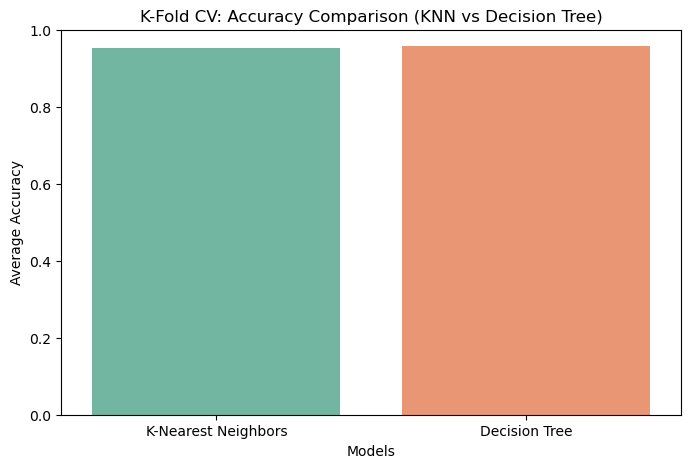

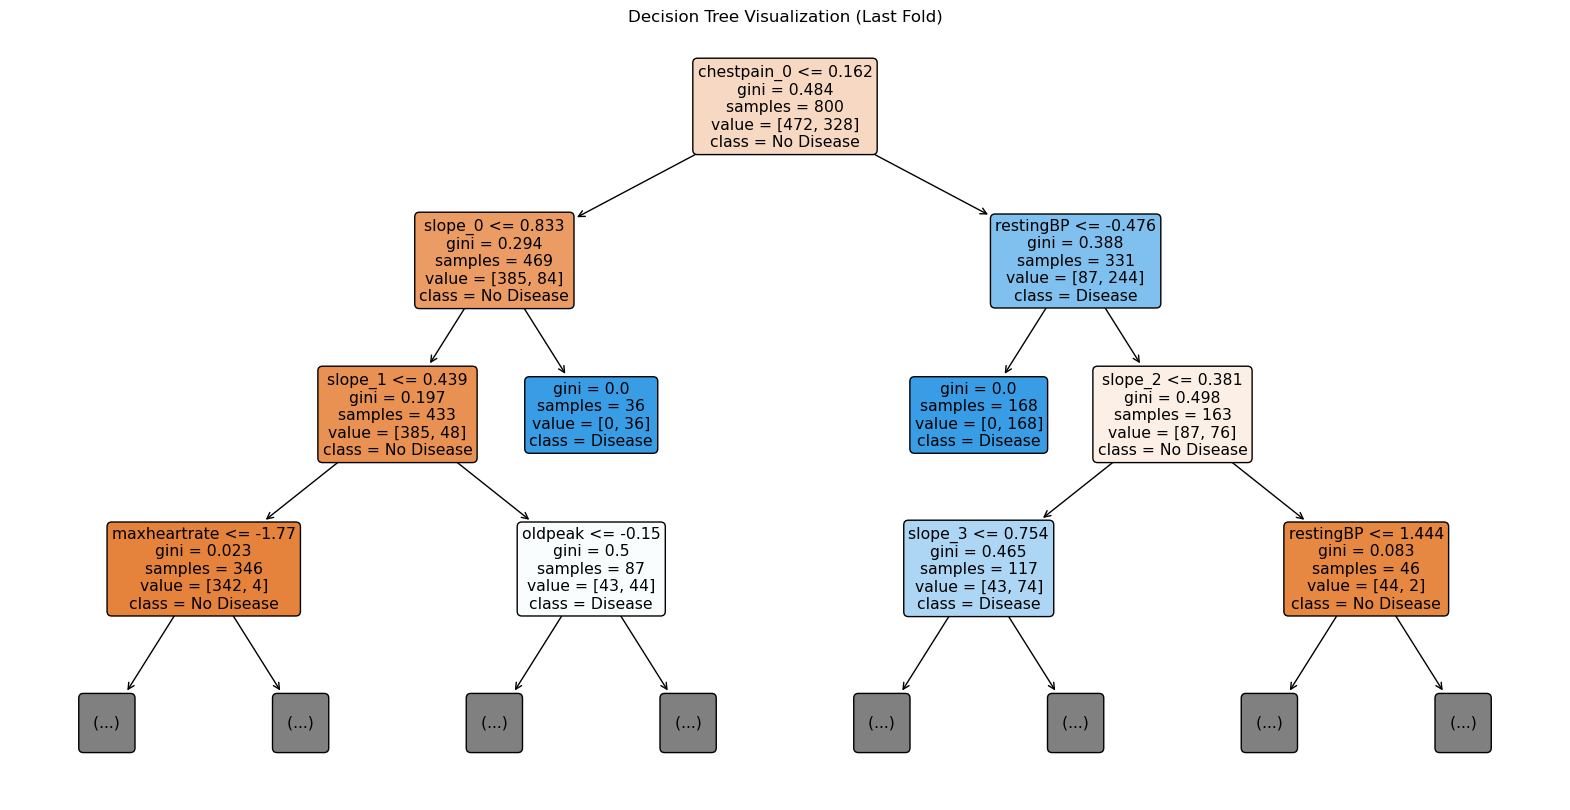

In [50]:
#KNN and Decision Tree

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Assuming X and y are already defined and X is a DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_array = y.to_numpy() if isinstance(y, pd.Series) else y

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}
last_dt_model = None  # To store the last trained Decision Tree for plotting

for name, model in models.items():
    acc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_array[train_index], y_array[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

        if name == "Decision Tree":
            last_dt_model = model  # Save the last fold's Decision Tree

    results[name] = {
        "Accuracy": np.mean(acc_scores),
        "Precision": np.mean(precision_scores),
        "Recall": np.mean(recall_scores),
        "F1-score": np.mean(f1_scores)
    }

    print(f"\nModel: {name}")
    print(f"Accuracy: {results[name]['Accuracy']:.4f}")
    print(f"Precision: {results[name]['Precision']:.4f}")
    print(f"Recall: {results[name]['Recall']:.4f}")
    print(f"F1-score: {results[name]['F1-score']:.4f}")

# ---- Accuracy Bar Plot ----
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[results[model]["Accuracy"] for model in results], palette="Set2")
plt.ylabel("Average Accuracy")
plt.xlabel("Models")
plt.title("K-Fold CV: Accuracy Comparison (KNN vs Decision Tree)")
plt.ylim(0, 1)
plt.show()

# ---- Decision Tree Plot ----
if last_dt_model is not None:
    plt.figure(figsize=(20, 10))
    plot_tree(
        last_dt_model,
        filled=True,
        feature_names=X.columns if hasattr(X, 'columns') else None,
        class_names=['No Disease', 'Disease'],
        rounded=True,
        max_depth=3  # Optional: show only top 3 levels for clarity
    )
    plt.title("Decision Tree Visualization (Last Fold)")
    plt.show()



Model: Support Vector Machine
Accuracy: 0.9610
Precision: 0.9510
Recall: 0.9555
F1-score: 0.9530

Model: Random Forest
Accuracy: 0.9730
Precision: 0.9657
Recall: 0.9696
F1-score: 0.9676


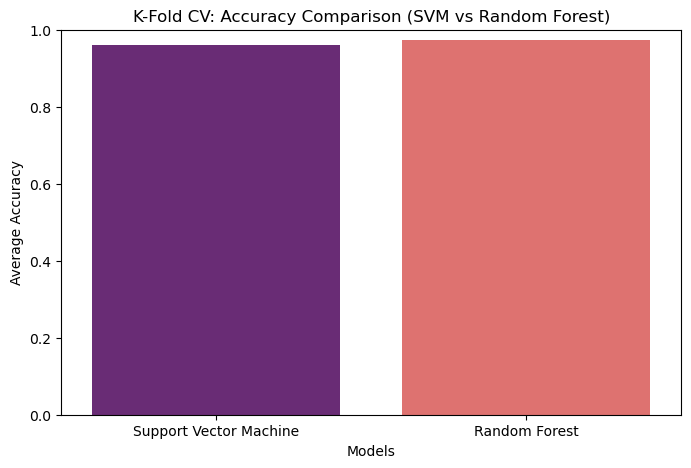

In [51]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---- Standardize the full dataset before applying cross-validation ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Models to evaluate ----
models = {
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ---- Initialize K-Fold ----
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ---- Store results ----
results = {}

for name, model in models.items():
    acc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

    # Store average metrics
    results[name] = {
        "Accuracy": np.mean(acc_scores),
        "Precision": np.mean(precision_scores),
        "Recall": np.mean(recall_scores),
        "F1-score": np.mean(f1_scores)
    }

    # Print the metrics
    print(f"\nModel: {name}")
    print(f"Accuracy: {np.mean(acc_scores):.4f}")
    print(f"Precision: {np.mean(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f}")
    print(f"F1-score: {np.mean(f1_scores):.4f}")

# ---- Bar Plot: Accuracy Comparison ----
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[results[model]["Accuracy"] for model in results], palette="magma")
plt.ylabel("Average Accuracy")
plt.xlabel("Models")
plt.title("K-Fold CV: Accuracy Comparison (SVM vs Random Forest)")
plt.ylim(0, 1)
plt.show()



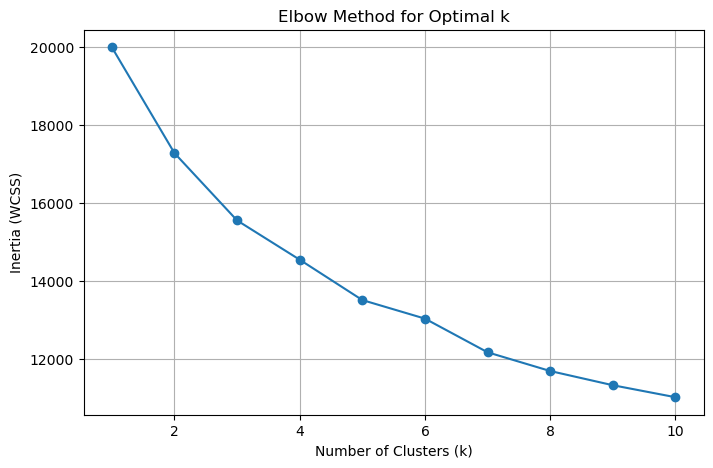

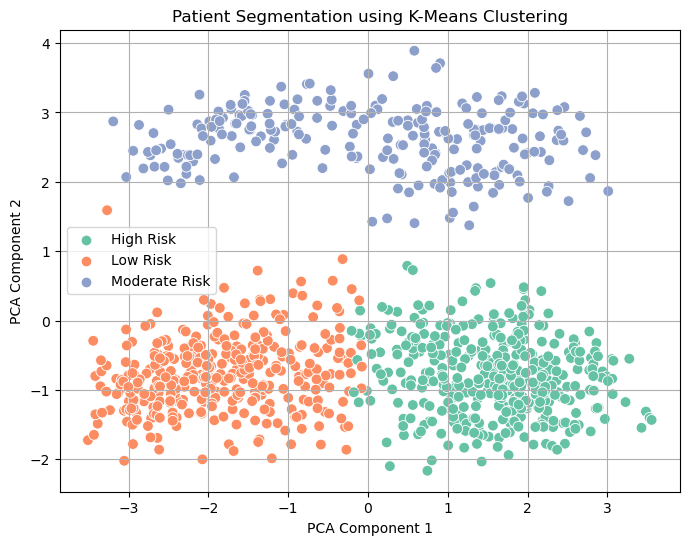

                  patientid       age  restingBP  serumcholestrol  \
Risk Category                                                       
High Risk      4.943785e+06  0.490359   0.665765         0.538239   
Low Risk       5.048256e+06  0.474022   0.382128         0.358622   
Moderate Risk  5.232326e+06  0.502564   0.582688         0.527493   

               maxheartrate   oldpeak  noofmajorvessels  gender_Female  \
Risk Category                                                            
High Risk          0.642531  0.528977          0.593137       0.000000   
Low Risk           0.505203  0.439629          0.205773       0.002793   
Moderate Risk      0.536374  0.271436          0.391738       1.000000   

               gender_Male  chestpain_0  ...  chestpain_2  chestpain_3  \
Risk Category                            ...                             
High Risk         1.000000     0.117647  ...     0.563725     0.051471   
Low Risk          0.997207     0.743017  ...     0.078212    

In [53]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------
# STEP 1: Load and Prepare Patient Data
# --------------------------------------
# Replace this with your actual DataFrame
# Example: df = pd.read_csv("patients.csv")
# Ensure the data contains only numeric features for clustering
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")  # <-- Replace with your dataset
X = df.select_dtypes(include=[np.number])  # use numeric features only

# --------------------------------------
# STEP 2: Standardize the Features
# --------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------------------
# STEP 3: Elbow Method to Determine Optimal k
# --------------------------------------
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()

# --------------------------------------
# STEP 4: Apply KMeans with optimal k
# --------------------------------------
optimal_k = 3  # Choose based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters

# --------------------------------------
# STEP 5: Map Clusters to Risk Categories
# --------------------------------------
# Optional: Order clusters by risk level using cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_order = np.argsort(np.sum(cluster_centers, axis=1))  # sum of feature values
risk_labels = ['Low Risk', 'Moderate Risk', 'High Risk']
risk_map = {cluster_order[i]: risk_labels[i] for i in range(optimal_k)}
df['Risk Category'] = df['Cluster'].map(risk_map)

# --------------------------------------
# STEP 6: Visualize Clusters in 2D using PCA
# --------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Risk Category'], palette='Set2', s=60)
plt.title("Patient Segmentation using K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------
# Optional: Show Group-wise Statistics
# --------------------------------------
print(df.groupby('Risk Category').mean(numeric_only=True))
